In [1]:
import pandas as pd

import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import pyreadr
from mpl_toolkits.mplot3d import Axes3D

import country_converter as coco
cc = coco.CountryConverter()

In [2]:
TWWI = pd.read_csv("DOT/TWWI.csv").replace(0, np.nan).dropna()
TWWI = TWWI.merge(( TWWI.groupby('Country')[["Year","TWWI"]]
                   .rolling(5, min_periods=1, on='Year', closed = "right")
                   .mean().reset_index().drop(columns = "level_1")
                   .rename(columns = {'TWWI':'TWWIavg'}) ), on = ["Country", "Year"], how = "left")#.fillna(0) 
TWWI = TWWI.reset_index(drop=True)
####TRADE WEIGHTED WORLD INCOME!!!!!

In [3]:
#TWWI[TWWI["Country"] == 'Germany']

In [4]:
tfp = pd.read_csv("tfp-at-constant-national-prices-20111.csv")
tfp = tfp.rename(columns = {"Entity" : "Country"})
tfp = tfp.replace({'United States' : 'USA'}).rename(columns = {"Total factor productivity index (using national accounts) (2017=1)" : "TFP"})
tfp["TFP"] = tfp["TFP"]*100

In [5]:
tfp["Country"] = cc.convert(names = tfp['Country'], to = "name_short")

In [6]:
pwt = pd.read_excel("pwt100.xlsx", sheet_name = "Data")[["country", "year", "ctfp", "cwtfp", "rtfpna", "rwtfpna"]]

#ctfp	TFP level at current PPPs (USA=1)
#cwtfp	Welfare-relevant TFP levels at current PPPs (USA=1)
#rtfpna	TFP at constant national prices (2017=1)
#rwtfpna	Welfare-relevant TFP at constant national prices (2017=1)

In [7]:
pwt = (pwt
    .rename(columns = {"country" : "Country", "year" : "Year", "rtfpna" : "TFP", "ctfp" : "CTFP", "cwtfp" : "CWTFP", "rwtfpna" : "WTFP"})
    .replace({'United States' : 'USA'}))

pwt[["CTFP", "CWTFP", "TFP", "WTFP"]]= pwt[["CTFP", "CWTFP", "TFP", "WTFP"]] * 100

##Removing USA as value always == 1
v = pwt[pwt["Country"] == "USA"]
v[["ctfp", "cwtfp"]] = np.nan
pwt[pwt["Country"] == "USA"] = v
pwt["Country"] = cc.convert(names = pwt['Country'], to = "name_short")
pwt[pwt["Country"] == "USA"].head(10)

C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\142776407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\142776407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. o

,Country,Year,CTFP,CWTFP,TFP,WTFP


In [8]:
WID_Data = pd.read_excel("WID_Data.xlsx", sheet_name = "Data")
WID_Data[WID_Data['Year'] == 2015].head(20)

,Percentile,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,...,sptinc_992_j_SN\nPre-tax national income \nBottom 50% | share | adults | equal split\nSenegal,sptinc_992_j_MG\nPre-tax national income \nBottom 50% | share | adults | equal split\nMadagascar,sptinc_992_j_CD\nPre-tax national income \nBottom 50% | share | adults | equal split\nDR Congo,sptinc_992_j_PL\nPre-tax national income \nBottom 50% | share | adults | equal split\nPoland,sptinc_992_j_EE\nPre-tax national income \nBottom 50% | share | adults | equal split\nEstonia,sptinc_992_j_QT-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nSouth Africa (at market exchange rate),sptinc_992_j_PG\nPre-tax national income \nBottom 50% | share | adults | equal split\nPapua New Guinea,sptinc_992_j_QO-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nNorth Africa (at market exchange rate),sptinc_992_j_QF-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nOceania (at market exchange rate),sptinc_992_j_ID\nPre-tax national income \nBottom 50% | share | adults | equal split\nIndonesia
65,pall,2015,0.432388,0.501557,0.540364,0.651422,0.538078,0.726932,0.651527,0.559097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,p0p50,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1338,0.1248,0.1264,0.1984,0.1729,0.0581,0.1297,0.1327,0.1171,0.1475
209,p50p90,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3891,0.3676,0.3852,0.4238,0.4692,0.2879,0.4082,0.3860,0.5114,0.4028
281,p90p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4771,0.5076,0.4884,0.3778,0.3579,0.6540,0.4621,0.4813,0.3714,0.4497
353,p99p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1318,0.1517,0.1463,0.1491,0.1114,0.1938,0.1628,0.1690,0.1296,0.1808


In [9]:
WID_G = WID_Data.iloc[:, 0:250]
WID_G = WID_G[WID_G.Percentile == 'pall'].drop(['Percentile'], axis = 1)

In [10]:
WID_G1 = WID_G
WID_G1 = WID_G1.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="Gini")

In [11]:
WID_G2 = WID_G1
WID_G2['Country'] = WID_G2['Country'].str.split('\n').str[3]
WID_G2 = WID_G2.replace({'Russian Federation' : 'Russia'})
WID_G2['Gini'] = WID_G2["Gini"]########################################################

In [12]:
WID_G2['Gini'].describe()

count    10584.000000
mean         0.580033
std          0.106081
min          0.208031
25%          0.499880
50%          0.593025
75%          0.651422
max          0.946778
Name: Gini, dtype: float64

In [13]:
#tfp_gini = pd.concat([tfp, WID_G2], axis=1, join="inner")
WID_G2["Country"] = cc.convert(names = WID_G2['Country'], to = "name_short")
tfp_gini = pwt.merge(WID_G2, on = ['Country', 'Year'], how="outer")
tfp_gini = tfp_gini[tfp_gini["Country"] != "South Africa"] ## Why is SA in the dataset twice

Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe

Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found in regex
Other MENA (at market exchange rate) not found i

In [14]:
swiid = pd.read_csv("swiid9_5\swiid9_5_summary.csv").replace(0,np.nan)

In [15]:
swiid = swiid.rename(columns = {'country' : 'Country', 'year': 'Year'})
swiid['Year'] = swiid['Year'].astype(int)
swiid.abs_red = swiid.gini_mkt - swiid.gini_disp
tfp_gini = tfp_gini.merge(swiid, on=['Country', 'Year'], how='outer')
tfp_gini

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Aruba,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,Yugoslavia,1986,NaN,NaN,NaN,NaN,NaN,33.9,3.10,47.2,7.20,13.3,NaN,NaN,NaN
19453,Yugoslavia,1987,NaN,NaN,NaN,NaN,NaN,34.2,3.11,47.3,7.22,13.1,NaN,NaN,NaN
19454,Yugoslavia,1988,NaN,NaN,NaN,NaN,NaN,34.5,3.13,47.5,7.24,13.0,NaN,NaN,NaN
19455,Yugoslavia,1989,NaN,NaN,NaN,NaN,NaN,34.7,3.12,47.6,7.25,12.9,NaN,NaN,NaN


In [16]:
### Choosing Measure of gini
tfp_gini['WIID'] = tfp_gini['Gini']
tfp_gini['Gini'] = tfp_gini['gini_disp']

In [17]:
"""
## IV
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)
model = linear_model.LinearRegression()
reg = model.fit(X[['lnGDPPC']], X['Gini'])
print(model.coef_[0])
"""

'\n## IV\nTGall[\'Gini\'] = TGall[\'Gini\'].replace(0, np.nan)\nX = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)\nmodel = linear_model.LinearRegression()\nreg = model.fit(X[[\'lnGDPPC\']], X[\'Gini\'])\nprint(model.coef_[0])\n'

In [18]:
# Normalize Gini Coefficient
#tfp_gini["NGini"] = np.nan
tfp_gini["-Gini"] = np.nan
tfp_gini["dGini"] = np.nan
tfp_gini["d5Gini"] = np.nan
tfp_gini["dpGini"] = np.nan
tfp_gini["d5pGini"] = np.nan
tfp_gini["dNGini"] = np.nan
tfp_gini["dpGinim5"] = np.nan
tfp_gini["Ginim5"] = np.nan

# Find the changes tfp and gini
tfp_gini["dTFP"] = np.nan
tfp_gini["dpTFP"] = np.nan
tfp_gini["dpTFPm1"] = np.nan
tfp_gini["dpTFPm2"] = np.nan
tfp_gini["dpTFPavg"] = np.nan
tfp_gini["-dpTFP^2"] = np.nan
tfp_gini["dpTFP^2"] = np.nan
tfp_gini["dpTFP^3"] = np.nan
tfp_gini["log(dpTFP)"] = np.nan

tfp_gini["dCTFP"] = np.nan
tfp_gini["dpCTFP"] = np.nan
tfp_gini["dCTFPm1"] = np.nan
tfp_gini["dCTFPm2"] = np.nan
tfp_gini["dCTFPavg"] = np.nan
tfp_gini["-dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^3"] = np.nan

tfp_gini["dWTFP"] = np.nan
tfp_gini["dWTFPm1"] = np.nan
tfp_gini["dWTFPm2"] = np.nan
tfp_gini["dWTFPavg"] = np.nan
tfp_gini["-dWTFP^2"] = np.nan
tfp_gini["dWTFP^2"] = np.nan
tfp_gini["dWTFP^3"] = np.nan



for x in tfp_gini["Country"].unique():
    temp = tfp_gini[tfp_gini["Country"] == x]

    #b = float(temp.loc[temp["Year"] == 2017, "Gini"])
    #temp["NGini"] = temp["Gini"].div(b) * 100

    temp["-Gini"] = temp["Gini"] - temp["Gini"].min()

    temp.dGini = temp['Gini'].diff(periods=1)
    temp.d5Gini = temp['Gini'].diff(periods=5)
    temp.dpGini = temp['dGini'].div(temp['Gini']) * 100
    temp.d5pGini = temp['d5Gini'].div(temp['Gini']) * 100
    #temp.dNGini = temp['NGini'].diff(periods=1)
    temp["dpGinim5"] = temp.dpGini.shift(+5)
    temp.Ginim5 = temp.Gini.shift(+5)

    temp["dTFP"] = temp['TFP'].diff(periods=1)
    temp["dpTFP"] = temp['dTFP'].div(temp['TFP'])*100
    temp["dpTFPm1"] = temp.dpTFP.shift(+1)
    temp["dpTFPm2"] = temp.dpTFPm1.shift(+1)
    temp["dpTFPavg"] = (temp["dpTFP"] + temp["dpTFPm1"] + temp["dpTFPm2"]).div(3)
    temp["-dpTFP^2"] = temp.dTFP*abs(temp.dTFP)
    temp["dpTFP^2"] = temp.dpTFP ** 2
    temp["dpTFP^3"] = temp.dpTFP ** 3
    temp["log(dpTFP)"] = np.log(temp["dpTFP"])

    temp["dCTFP"] = temp['CTFP'].diff(periods=1)
    temp["dpCTFP"] = temp['dCTFP'].div(temp['CTFP'])*100
    temp["dCTFPm1"] = temp.dCTFP.shift(+1)
    temp["dCTFPm2"] = temp.dCTFPm1.shift(+1)
    temp["dCTFPavg"] = (temp["dCTFP"] + temp["dCTFPm1"] + temp["dCTFPm2"]).div(3)
    temp["-dpCTFP^2"] = temp.dCTFP*abs(temp.dCTFP)
    temp["dpCTFP^2"] = temp.dpCTFP ** 2 
    temp["dpCTFP^3"] = temp.dpCTFP ** 3

    temp["dWTFP"] = temp['WTFP'].diff(periods=1)
    temp["dWTFPm1"] = temp.dWTFP.shift(+1)
    temp["dWTFPm2"] = temp.dWTFPm1.shift(+1)
    temp["dWTFPavg"] = (temp["dWTFP"] + temp["dWTFPm1"] + temp["dWTFPm2"]).div(3)
    temp["-dWTFP^2"] = temp.dWTFP*abs(temp.dWTFP)
    temp["dWTFP^2"] = temp.dWTFP ** 2
    temp["dWTFP^3"] = temp.dWTFP ** 3

    tfp_gini[tfp_gini["Country"] == x] = temp

C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\2899035954.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["-Gini"] = temp["Gini"] - temp["Gini"].min()
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\2899035954.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dGini = temp['Gini'].diff(periods=1)
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\2899035954.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [19]:
##Add GDP per capita before removing years
GDPpc_Data = (pd.read_excel("mpd2020.xlsx", sheet_name = "Full data")
                .drop(columns = ["countrycode"])
                .rename(columns = {"gdppc" : "GDPPC", "country" : "Country", "year" : "Year"})
                .replace({'United States' : 'USA'}))
GDPpc_Data['GDP'] = GDPpc_Data['GDPPC'] * GDPpc_Data['pop']

##ONLY if using relative GDPPC###
"""
GDPpc_Data['gdppc'] = GDPpc_Data['GDPPC']
GDPpc_Data['GDPPC']  = GDPpc_Data['GDPPC'] / GDPpc_Data.groupby(['Year'])['GDPPC'].transform('max')
"""
###___________________________________________

GDPpc_Data["Country"] = cc.convert(names = GDPpc_Data['Country'], to = "name_short")
TGall = tfp_gini.merge(GDPpc_Data, on = ['Country', 'Year'], how = 'outer')

TGall["dGDPPC"] = np.nan
TGall["d5GDPPC"] = np.nan
TGall["dpGDPPC"] = np.nan
TGall["d5pGDPPC"] = np.nan
TGall["dpGDPPC^2"] = np.nan
TGall["lnGDPPC"] = np.nan

##Differnece in GDPpc_Data
for x in TGall["Country"].unique():
    temp = TGall[TGall["Country"] == x]

    temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
    temp["d5GDPPC"] = temp['GDPPC'].diff(periods=5)
    temp["dpGDPPC"] = temp["dGDPPC"].div(temp['GDPPC'])*100
    temp["d5pGDPPC"] = temp["d5GDPPC"].div(temp['GDPPC'])*100
    temp["dpGDPPC^2"] = temp["dpGDPPC"] ** 2
    temp["lnGDPPC"] = np.log(temp["GDPPC"])

    TGall[TGall["Country"] == x] = temp

D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D

In [20]:
TGall = TGall.sort_values(by = ["Country", "Year"])

In [21]:
TGall["Gini2m5"] = TGall["Ginim5"]**2
TGall["lnGG"] = TGall["lnGDPPC"].mul(TGall['Gini'])
TGall["lnGGm5"] = TGall["lnGG"].shift(5)
TGall["lnGDPPCm5"] = TGall["lnGDPPC"].shift(5)
TGall = TGall.replace([np.nan, -np.inf], 0)

In [22]:
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)

In [23]:
TGall = TGall.merge(TWWI, on = ["Country", "Year"], how = "left")

https://ourworldindata.org/taxation 

In [24]:
tmitr = (pd.read_csv("top-income-tax-rates-piketty.csv")
        .rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        .drop(columns = "Code")
        .replace({'United States' : 'USA'}))
tmitr["Country"] = cc.convert(names = tmitr['Country'], to = "name_short")
TGall = TGall.merge(tmitr, on = ['Country', 'Year'], how = 'left')

In [25]:
oil = (pd.read_csv("API_TX.VAL.FUEL.ZS.UN_DS2_en_csv_v2_5996827.csv") #World Bank, % merchendise oil
        #.rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        #.drop(columns = "Code")
        .replace({'United States' : 'USA', 'Country Name': 'Country'}))
oil = oil.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis = 1)
oil = pd.melt(oil, id_vars=['Country Name'], value_vars= oil.columns[1:64])
oil = oil.rename(columns={"Country Name": "Country", "variable": "Year", "value": "Oil"})
oil['Year'] = oil['Year'].astype(int)
oil['Oil'] = ( oil.groupby('Country', group_keys=False)['Oil']
                         .apply(lambda x: x.interpolate(method = 'linear', limit_area='inside')) ) # Interpolation of missing values in oil, linear

oil = oil.merge(GDPpc_Data, how = 'left', on = ['Country', 'Year'])

oil['OdivGDP'] = oil.Oil.div(oil.GDP) #oil exports as % gdp

OilW = ( oil.groupby('Country')[["Year",'OdivGDP']]
        .rolling(5, min_periods=1, on='Year', closed = "left")
        .mean().reset_index().drop(columns = "level_1")
        .rename(columns = {'OdivGDP':'OilW'}).fillna(0) ) ##calculating oil averge over previous 5 years
oil = oil.merge(OilW, on= ['Year','Country'], how = "outer")

oil["Country"] = cc.convert(names = oil['Country'], to = "name_short")

TGall = TGall.merge(oil, on = ['Country', 'Year'], how = 'left' )

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [26]:
Pr = ( pd.read_excel("statistic_id262858_opec-oil-price-annually-1960-2024.xlsx", sheet_name="Data", skiprows = 4)
      .drop(columns = "Unnamed: 0")
      .rename(columns = {"Unnamed: 1": "Year", "Unnamed: 2": "Price"}) )
Pr.drop(Pr.tail(1).index,inplace=True)
Pr['Year'] = Pr['Year'].astype(int)
Pr['lnP'] = np.log(Pr['Price'])
Pr['dlnP'] = Pr["lnP"].diff(1) ##calculating oil over previous 5 years
TGall = TGall.merge(Pr, on = ['Year'], how = 'left')
TGall['OilP'] = TGall['Oil'].mul(TGall['Price'])
TGall['OlnP'] = TGall['Oil'].mul(TGall['lnP'])

In [27]:
TGall = TGall[TGall.Country !=  'not found']

In [28]:
save = TGall

In [29]:
TGall = save

In [30]:
TGall['OilWP'] = TGall['OilW'] * TGall['dlnP']

OPS = ( TGall[["Year", 'Country', 'OilWP']].groupby('Country')[["Year",'OilWP']]
        .rolling(5, min_periods=1, on='Year', closed = "right")
        .mean().reset_index().drop(columns = "level_1")
        .rename(columns = {'OilWP':'OPS'}) ) ##calculating oil averge over previous 5 years
OPS = OPS[OPS.Country != 'not found']
OPS
TGall = TGall.merge(OPS, on= ['Year','Country'], how = "left")

In [31]:
TGall[['Country','OilWP', 'OPS']][300:330]

,Country,OilWP,OPS
300,Angola,-6.834023e-09,-4.292453e-09
301,Angola,-1.456096e-08,-7.204646e-09
302,Angola,-7.770288e-09,-8.758704e-09
303,Angola,-2.808548e-09,-8.536067e-09
304,Angola,-1.534540e-08,-9.463844e-09
305,Angola,-2.056492e-08,-1.221002e-08
306,Angola,1.770407e-07,2.611030e-08
307,Angola,4.733403e-08,3.713117e-08
308,Angola,3.725819e-07,1.122093e-07
309,Angola,1.710291e-06,4.573365e-07


In [32]:
## IV
TGall = TGall[TGall.Year >= 1960] # remove years before 1960
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["TWWI", "Gini", "OilWP", "lnGDPPC"]].replace(0, np.nan).dropna(axis=0)
X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
X['B0'] = 1
model = linear_model.LinearRegression(fit_intercept=False)
reg = model.fit(X[['TWWI', 'OilWP', 'lnGDPPC', 'B0']], X['Gini'])
print(model.coef_)
## the beta on gdppc is 100 times higher with the other variables included
AdjGDP = 0 #model.coef_[2]
#TGall['predIVGini'] = reg.predict(TGall['lnGDPPC'].values.reshape(-1, 1))
TGall['IVGini'] = TGall['Gini'] - TGall['lnGDPPC'].mul(AdjGDP)
#TGall['IVGini'] = TGall['Gini'] - TGall['predIVGini']

TGall['IVGini'] = TGall['IVGini'].replace(0, np.nan)
TGall['IVGinim5'] = TGall["IVGini"].shift(5)

TGall["IVlnGG"] = TGall["lnGDPPC"].mul(TGall['IVGini'])
TGall["IVlnGGm5"] = TGall["IVlnGG"].shift(5)

TGall['IVGini2m5'] = TGall['IVGinim5'].mul(TGall['IVGinim5'])
TGall['IVlnGG2m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPCm5'])

TGall['IVGini3m5'] = TGall['IVGinim5'].mul(TGall['IVGinim5']).mul(TGall['IVGinim5'])
TGall['IVlnGG3m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPCm5']).mul(TGall['IVGinim5'])

[ 2.45428811e-12  1.90186735e-06 -3.83301338e+00  7.24613931e+01]


In [33]:
### This is just a proof
"""
TGall['Gini'] = tfp_gini['Gini'].replace(0, np.nan)
temp = TGall[["lnGDPPC", "Gini", "TWWI"]].dropna(axis=0)
a = np.cov([temp['TWWI'], temp['Gini']])[0][1] / np.cov([temp['lnGDPPC'], temp['TWWI']])[0][1]
temp['Z'] = temp['Gini'] - (a * temp['lnGDPPC'])
b = np.cov([temp['Z'], temp['lnGDPPC']])[0][1] / np.cov([temp['Gini'], temp['Z']])[0][1]
b
"""

'\nTGall[\'Gini\'] = tfp_gini[\'Gini\'].replace(0, np.nan)\ntemp = TGall[["lnGDPPC", "Gini", "TWWI"]].dropna(axis=0)\na = np.cov([temp[\'TWWI\'], temp[\'Gini\']])[0][1] / np.cov([temp[\'lnGDPPC\'], temp[\'TWWI\']])[0][1]\ntemp[\'Z\'] = temp[\'Gini\'] - (a * temp[\'lnGDPPC\'])\nb = np.cov([temp[\'Z\'], temp[\'lnGDPPC\']])[0][1] / np.cov([temp[\'Gini\'], temp[\'Z\']])[0][1]\nb\n'

In [34]:
hdiData  = (pd.read_csv("HDItimeseries.csv")
            .iloc[:, 0:34]
            .drop(columns=['hdi_rank_2021']))
hdiData = pd.melt(hdiData, id_vars=["iso3", "country", "hdicode", "region"], var_name="Year", value_name="HDI")
hdiData.Year = hdiData.Year.str.split("_").str[1].astype(int)
hdiData["country"] = cc.convert(names = hdiData['country'], to = "name_short")
#hdiData["iso3"] = cc.convert(names = hdiData['iso3'], to = "name_short")
hdiData = hdiData.dropna().rename(columns={"country":"Country"})
hdiData

Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex


World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human

,iso3,Country,hdicode,region,Year,HDI
0,AFG,Afghanistan,Low,SA,1990,0.273
2,ALB,Albania,High,ECA,1990,0.647
4,ARE,United Arab Emirates,Very High,AS,1990,0.728
5,ARG,Argentina,Very High,LAC,1990,0.723
6,ARM,Armenia,High,ECA,1990,0.656
...,...,...,...,...,...,...
5958,WSM,Samoa,High,EAP,2018,0.716
5959,YEM,Yemen,Low,AS,2018,0.459
5960,ZAF,South Africa,High,SSA,2018,0.726
5961,ZMB,Zambia,Medium,SSA,2018,0.572


In [35]:
GNId = pd.read_excel("GNIclean.xlsx").drop(columns = ["Indicator Name", "Indicator Code"]).rename(columns = {"Country Name": "Country"})
GNId = pd.melt(GNId, id_vars=["Country", "Country Code"], var_name="Year", value_name="GNI")
GNId["Country"] = cc.convert(names = GNId['Country'], to = "name_short")
GNId = GNId.replace("not found",np.nan).dropna()
GNId.Year = GNId.Year.astype(int)
GNId

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

,Country,Country Code,Year,GNI
545,Australia,AUS,1962,1870.0
546,Austria,AUT,1962,1060.0
548,Burundi,BDI,1962,70.0
549,Belgium,BEL,1962,1450.0
550,Benin,BEN,1962,90.0
...,...,...,...,...
16752,Samoa,WSM,2022,3660.0
16753,Kosovo,XKX,2022,5660.0
16755,South Africa,ZAF,2022,6780.0
16756,Zambia,ZMB,2022,1240.0


In [36]:
TGall.replace("not found",np.nan).dropna()
TGall = TGall.merge(hdiData, on = ['Country', 'Year'], how = 'left')
TGall.HDI = TGall.HDI.mul(100)
TGall = TGall.merge(GNId, on = ['Country', 'Year'], how = "left")

In [37]:
TGall["lnHDI"] = np.log(TGall["HDI"])
TGall["lnHDIm5"] = TGall["lnHDI"].shift(5)
TGall["GHDIm5"] = TGall["lnHDIm5"].mul(TGall["Ginim5"])
TGall["GHDI2m5"] = TGall["lnHDIm5"].mul(TGall["Gini2m5"])

https://ourworldindata.org/taxation

https://stats.oecd.org/viewhtml.aspx?datasetcode=TABLE_I7&lang=en 

In [38]:
TMITR = (pd.read_csv("TMITR.csv")
        .drop(columns = ["COU", "YEA", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"]))
TMITR = (TMITR[TMITR["TAX"] == "TOP_TRATE"]
        .drop(columns = ["TAX", "Income Tax"])
        .rename(columns = {"Value" : "TMITR2"})
        .replace({'United States' : 'USA'}))
TMITR["Country"] = cc.convert(names = TMITR['Country'], to = "name_short")
TGall = TGall.merge(TMITR, on = ['Country', 'Year'], how = 'left')

In [39]:
nData = ( pd.read_csv("API_SP.POP.GROW_DS2_en_csv_v2_5995052.csv")
         .drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)
         .rename(columns={"Country Name": "Country"})
)
nData = pd.melt(nData, id_vars=["Country"], var_name="Year", value_name="n")
nData.Year = nData.Year.astype(int)

In [40]:
nData["Country"] = cc.convert(names = nData['Country'], to = "name_short")
nData = nData.replace("not found",np.nan).dropna()
TGall = TGall.merge(nData, on=["Country", "Year"], how="left")

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex


Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
La

In [41]:
EXP = pd.read_excel("ExportClean.xlsx")
EXP["Country"] = cc.convert(names = EXP['Country'], to = "name_short")
EXP = EXP.melt(id_vars = ["Country"], var_name= "Year", value_name="Exports")
EXP

World not found in regex
Advanced Economies not found in regex
Euro Area not found in regex
Belgium-Luxembourg not found in regex
Emerging and Developing Economies not found in regex
Emerging and Developing Asia not found in regex
Asia not specified not found in regex
Emerging and Developing Europe not found in regex
Serbia and Montenegro not found in regex
Yugoslavia not found in regex
USSR not found in regex
Europe not specified not found in regex
Middle East and Central Asia not found in regex
Middle East and Central Asia not specified not found in regex
Sub-Saharan Africa not found in regex
Africa not specified not found in regex
Western Hemisphere not found in regex
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than on

,Country,Year,Exports
0,Australia,1961,1.649800e+03
1,not found,1961,1.118932e+05
2,not found,1961,8.061409e+04
3,not found,1961,3.349622e+04
4,Austria,1961,1.287490e+03
...,...,...,...
15123,not found,2022,7.793334e+05
15124,not found,2022,8.527102e+05
15125,not found,2022,7.386401e+06
15126,not found,2022,1.186943e+06


Do a test where we show that linear is not good

In [42]:
#pd.get_dummies(TGall["Country"])

In [43]:
TGall.Price.isna().sum() / len(TGall.Price)

0.0

In [44]:
## State Fixed Effects
#TGallFE = pd.concat([TGall, pd.get_dummies(TGall["Country"])], axis = 1)

In [45]:
#TGallFE.iloc[:,TGallFE.columns.get_loc("Albania"):].tail()

In [46]:
TGall = TGall[TGall.Country !=  'not found']

In [47]:
#intensity level 2 only , https://ucdp.uu.se/downloads/index.html#armedconflict
Conf = pd.read_excel("Dyadic_v23_1.xlsx")[['location', 'year', 'intensity_level']].rename(columns  = {'year': "Year", "location": "Country"})
Conf = Conf[Conf['intensity_level'] == 2].drop(columns  = "intensity_level")
Conf['Country'] = Conf['Country'].str.split(',')
Conf = Conf.explode('Country')
Conf.Country = cc.convert(names = Conf['Country'], to = "name_short")
Conf = Conf[Conf.Country !=  'not found']
Conf['Conflict'] = 1
#Conf['Adj5']  = 
Conf = Conf.sort_values(by = ["Country", "Year"])
#Conf['Adj5'] = Conf.groupby('Country')['Conflict'].shift(5)
Conf

Hyderabad not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
Hyderabad not found in regex
Hyderabad not found in regex


,Country,Year,Conflict
428,Afghanistan,1978,1
429,Afghanistan,1979,1
430,Afghanistan,1980,1
440,Afghanistan,1980,1
447,Afghanistan,1980,1
...,...,...,...
676,Yemen,2022,1
371,Zimbabwe,1976,1
372,Zimbabwe,1977,1
373,Zimbabwe,1978,1


In [48]:

TGall = TGall.merge(Conf, on = ["Year", "Country"], how = "left")

In [49]:
### Remove all years with conflict and 5 years before or after
TGall.Conflict = TGall.Conflict.fillna(0)
TGall["Con5"] = (TGall.groupby('Country')['Conflict']
                  .transform(lambda x: x.shift(5))
                  .fillna(0)
                  .astype(int))
TGall["Con-5"] = (TGall.groupby('Country')['Conflict']
                  .transform(lambda x: x.shift(-5))
                  .fillna(0)
                  .astype(int))
TGall = TGall[TGall['Conflict'] == 0]
TGall = TGall[TGall['Con5'] == 0]
TGall = TGall[TGall['Con-5'] == 0]
TGall = TGall.drop(columns = ["Conflict", "Con5", "Con-5"])
TGall

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,region,HDI,Country Code,GNI,lnHDI,lnHDIm5,GHDIm5,GHDI2m5,TMITR2,n
0,Afghanistan,1960,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.925952
2,Afghanistan,1962,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014879
3,Afghanistan,1963,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.078997
4,Afghanistan,1964,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.139651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,Zimbabwe,2017,40.277901,43.239212,100.000000,100.000000,47.2,47.2,3.31,49.6,...,SSA,59.4,ZWE,1170.0,4.084294,4.019980,188.939067,8880.136145,NaN,2.043620
20833,Zimbabwe,2018,38.205928,41.876650,101.816285,97.741020,47.3,47.3,3.39,49.7,...,SSA,60.2,ZWE,1550.0,4.097672,4.037774,189.775388,8919.443232,NaN,2.020537
20834,Zimbabwe,2019,35.197261,38.834456,91.761684,90.910012,47.4,47.4,3.45,49.8,...,NaN,NaN,ZWE,1450.0,NaN,4.053523,190.920913,8992.374999,NaN,1.989253
20835,Zimbabwe,2020,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,ZWE,1460.0,NaN,4.063885,191.409000,9015.363910,NaN,2.031112


In [50]:
"""
def cd(country = "Canada"):
    return tfp_gini[tfp_gini['Country'] == country]
"""

'\ndef cd(country = "Canada"):\n    return tfp_gini[tfp_gini[\'Country\'] == country]\n'

In [51]:
"""
def all(country = "Canada"):
        return TGall[TGall['Country'] == country]
        """

'\ndef all(country = "Canada"):\n        return TGall[TGall[\'Country\'] == country]\n        '

In [52]:
def TGC(vars = ["TFP", "Gini", "-Gini", "dpTFP", "dpGini", "dNGini"], FE = False, Year = False):
    TGallD = TGall[vars]
    if Year == True:
        TGallD = pd.concat([TGall["Year"], TGallD], axis = 1)
    if FE == True:
        TGallD = pd.concat([TGallD, pd.get_dummies(TGall["Country"])], axis = 1)
    #if d == True:
    #    TGallD = pd.concat([TGall["dpGDPPC"], TGallD], axis = 1)
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD.replace(0, np.nan).dropna(axis = 0)
    #TGallD = TGallD[(np.abs(stats.zscore(TGallD[vars])) < 3).all(axis=1)]
    return TGallD

In [53]:
def TGCc(vars = ["TFP", "Gini", "NGini", "-Gini", "dTFP", "dGini", "dNGini", "dTFPavg"], country = "Canada"):
    TGallD = TGall[TGall['Country'] == country]
    TGallD = TGallD[vars].dropna()
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD[(np.abs(stats.zscore(TGallD)) < 3).all(axis=1)]
    return TGallD

In [54]:
TGall = TGall[TGall.Year >  1959]

In [55]:
# TGCc(["CTFP", "TFP", "dCTFP", "dTFP", "dpCTFP", "dpTFP"], country = "Canada").tail(15).to_excel("dTFP_Canada.xlsx")

In [56]:
print(len(WID_G2))
#Need to compare country names
print(len(tfp_gini))
print(len(swiid))

17856
19457
6109


In [57]:
TGall

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,region,HDI,Country Code,GNI,lnHDI,lnHDIm5,GHDIm5,GHDI2m5,TMITR2,n
0,Afghanistan,1960,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.925952
2,Afghanistan,1962,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014879
3,Afghanistan,1963,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.078997
4,Afghanistan,1964,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.139651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,Zimbabwe,2017,40.277901,43.239212,100.000000,100.000000,47.2,47.2,3.31,49.6,...,SSA,59.4,ZWE,1170.0,4.084294,4.019980,188.939067,8880.136145,NaN,2.043620
20833,Zimbabwe,2018,38.205928,41.876650,101.816285,97.741020,47.3,47.3,3.39,49.7,...,SSA,60.2,ZWE,1550.0,4.097672,4.037774,189.775388,8919.443232,NaN,2.020537
20834,Zimbabwe,2019,35.197261,38.834456,91.761684,90.910012,47.4,47.4,3.45,49.8,...,NaN,NaN,ZWE,1450.0,NaN,4.053523,190.920913,8992.374999,NaN,1.989253
20835,Zimbabwe,2020,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,ZWE,1460.0,NaN,4.063885,191.409000,9015.363910,NaN,2.031112


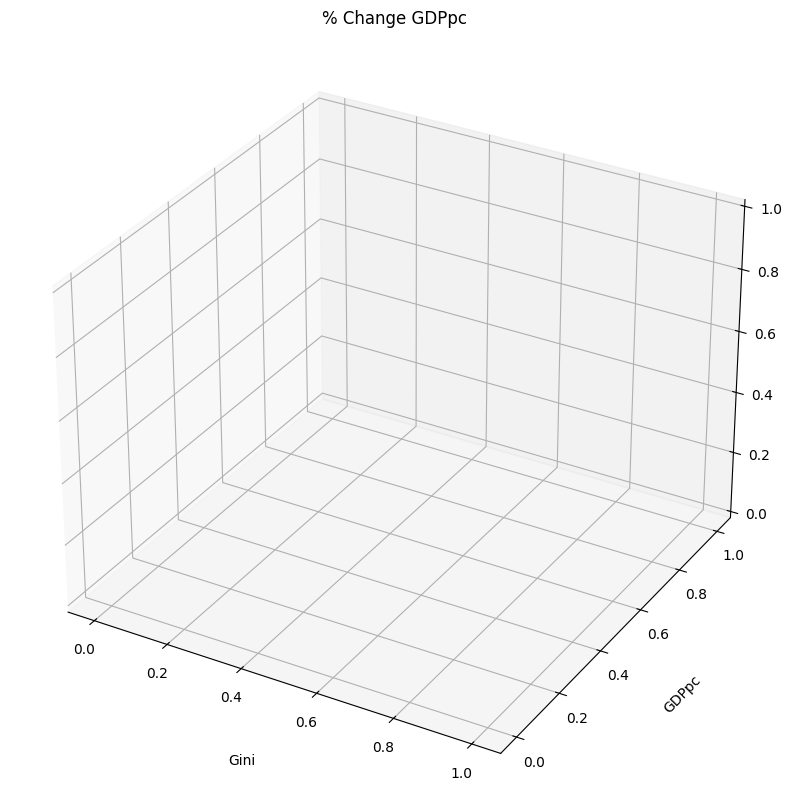

<Axes: >

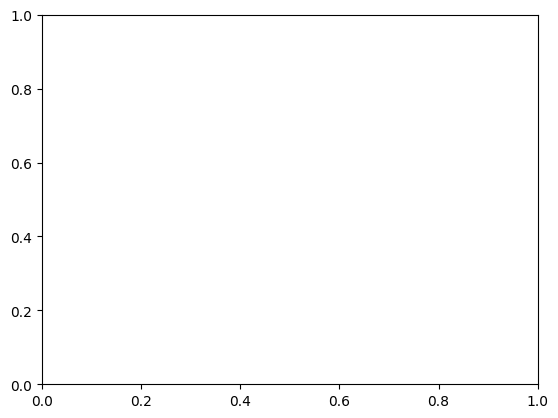

In [58]:
temp = TGall[TGall.Country == ""]
temp = temp[['IVGinim5', "lnGDPPCm5", "lnGDPPC"]].replace(0,np.nan).dropna()
x = temp['IVGinim5']
y = temp['lnGDPPCm5']
z = temp['lnGDPPC'] - temp['lnGDPPCm5']

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()



ax.scatter(x, y, z, c = 'b')
ax.set_title('% Change GDPpc')

# Set axes label
ax.set_xlabel('Gini', labelpad=20)
ax.set_ylabel('GDPpc', labelpad=20)
ax.set_zlabel('% Change GDPpc', labelpad=20)

plt.show()

sns.lineplot(x = x, y = z)

In [59]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X.to_csv("tansferdata.csv")

In [60]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X.describe()

,Year,IVlnGGm5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3.103000e+03,3.103000e+03
mean,2001.382211,340.805467,38.704995,9.020535,8.887207,1562.774051,13586.907042,1.325626,2.591516e-08,3.539295e+11
std,11.869953,65.265868,8.044766,1.101090,1.074645,622.188120,5033.799489,1.165399,1.224056e-07,4.658684e+11
min,1965.000000,182.951916,21.200000,6.340359,6.539036,449.440000,3878.580609,-2.415521,-7.187136e-07,9.583460e+06
25%,1994.000000,292.204411,32.600000,8.183155,8.057448,1062.760000,9571.129649,0.521868,-1.770968e-10,6.217439e+10
50%,2004.000000,336.634249,39.100000,9.175585,9.023947,1528.810000,13621.105327,1.289595,5.818260e-10,1.748259e+11
75%,2011.000000,388.280635,44.300000,9.885753,9.710580,1962.490000,16779.806192,2.163764,8.813175e-09,4.582928e+11
max,2018.000000,508.534279,58.900000,11.954613,11.945740,3469.210000,29641.523325,5.617456,8.312979e-07,3.007702e+12


In [61]:
X = TGall[["Year", "Country", "IVlnGGm5", "Ginim5", "IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5']].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X['pdGDPPC'] = X['lnGDPPC'] - X['lnGDPPCm5']
X.describe()

,Year,IVlnGGm5,Ginim5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,pdGDPPC
count,5489.000000,5489.000000,5489.000000,5489.000000,5489.000000,5489.000000,5489.000000,5489.000000,5489.000000
mean,2001.429586,331.716089,37.069211,37.124085,9.121790,8.999658,1437.457408,12672.940047,0.122132
std,12.246474,64.208880,7.747580,7.698737,1.090379,1.088141,584.452044,4789.500290,0.158307
min,1965.000000,158.312327,16.800000,16.800000,6.340359,6.539036,282.240000,2659.647088,-1.408219
25%,1994.000000,283.772318,31.800000,32.000000,8.327051,8.140898,1024.000000,9324.657145,0.042737
50%,2004.000000,328.026333,36.900000,36.800000,9.305923,9.206417,1354.240000,12140.755146,0.112551
75%,2011.000000,380.562792,42.400000,42.400000,9.999017,9.904393,1797.760000,15501.915420,0.214483
max,2018.000000,523.822148,58.000000,58.000000,11.959526,11.954613,3364.000000,28798.854703,0.956335


In [62]:
#plt.hist(X.abs_red)

In [63]:
meandelta = X.lnGDPPC.mean() - X.lnGDPPCm5.mean()
meandelta

0.12213218420899707

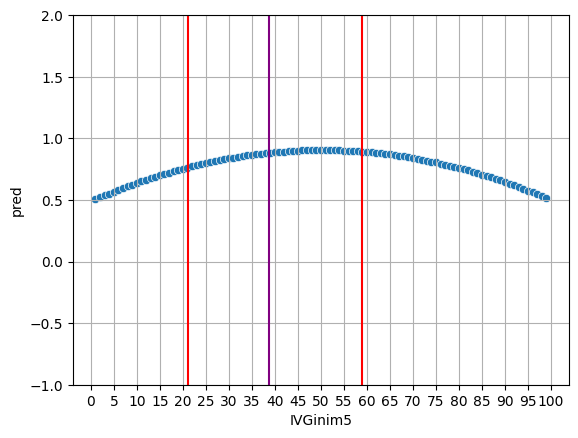

In [150]:
#X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X.to_csv("tansferdata.csv")
dummYear = pd.get_dummies(X.Year).fillna(0)
dummCountry = pd.get_dummies(X.Country).fillna(0)
X2 = pd.concat([X.drop(columns = ['Year', 'Country']), dummYear, dummCountry ], axis=1)# dummy years + country
X2.columns = X2.columns.astype(str)
MAINmodel = linear_model.LinearRegression(fit_intercept=False)
X3 = X2.drop(columns = ['lnGDPPC'])
X3["B0"] = 1
reg = MAINmodel.fit(X3, X2['lnGDPPC'])
ission = pd.DataFrame(columns = X3.columns)
ission.loc[len(ission)] = reg.coef_

Arti = pd.DataFrame(columns = X.columns)

Arti['IVGinim5'] = range(1,100) ###This goes first!

Arti['Country'] = 'France'
Arti['Year'] = 2005
Arti['lnGDPPCm5'] = 8
Arti['n'] = 1.369193e+00
Arti['OPS'] = 6.818957e-10
Arti['TWWIavg'] = 2.056748e+11

Arti['IVGini2m5'] = Arti['IVGinim5'] ** 2
#Arti['IVGini3m5'] = Arti['IVGinim5'] ** 3

Arti['IVlnGGm5'] = Arti['IVGinim5'] * Arti['lnGDPPCm5']
Arti['IVlnGG2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPCm5']
#Arti['IVlnGG3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPCm5']


Arti['pred'] = ission.B0[0] + ission[str(Arti['Year'][0])][0] + ission[Arti['Country'][0]][0] #str(Arti['Year'][0]) gets fixed effect for that year
for column in Arti.drop(columns = ["Year", "Country", "lnGDPPC", "pred"]):
    i = column
    Arti['pred'] = Arti['pred'] + (Arti[i]  * ission[i][0])
Arti['pred'] = Arti['pred'] - Arti['lnGDPPCm5']
"""
Arti['pred'] = ( 5.319 + (Arti['IVGinim5'] * -2.107e-01) 
                #- meandelta
                #+ (Arti['Year'] * 3.901e-01)
                + (Arti['IVGini2m5'] * 3.420e-03)
                - (Arti['lnGDPPCm5'] * 3.430e-01) + (Arti['IVlnGGm5'] * 2.509e-02)
                + (Arti['IVlnGG2m5'] * -3.962e-04) + (Arti['n'] * 4.158e-03)
                + (Arti['OPS'] * 4.390e+03) + (Arti['TWWIavg'] * -5.826e-15) )
"""

Arti
ax = sns.scatterplot(data=Arti[['IVGinim5', 'pred']], x = 'IVGinim5', y = 'pred')
ax.set_xticks(range(0,101, 5))
ax.axvline(x = X.IVGinim5.min(),    # Line on x = 2
           ymin = 100, # Bottom of the plot
           ymax = -100,
           color = 'red') # Top of the plot
ax.axvline(x = X.IVGinim5.max(),    # Line on x = 2
           ymin = 100, # Bottom of the plot
           ymax = -100,
           color = 'red') # Top of the plot
ax.axvline(x = X.IVGinim5.mean(),    # Line on x = 2
           ymin = 100, # Bottom of the plot
           ymax = -100,
           color = 'purple') # Top of the plot
ax.set_ylim(-1, 2)
plt.grid()
plt.show()

## Create a column that has the max of each year for relative gdppc

##Answers don't make sense with IV that I created
## Answers don't make sense when whne taken to the the third degree

In [65]:
Arti

,Year,Country,IVlnGGm5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg,pred
0,2005,France,8,1,NaN,8,1,8,1.369193,6.818957e-10,2.056748e+11,0.504442
1,2005,France,16,2,NaN,8,4,32,1.369193,6.818957e-10,2.056748e+11,0.520504
2,2005,France,24,3,NaN,8,9,72,1.369193,6.818957e-10,2.056748e+11,0.536237
3,2005,France,32,4,NaN,8,16,128,1.369193,6.818957e-10,2.056748e+11,0.551640
4,2005,France,40,5,NaN,8,25,200,1.369193,6.818957e-10,2.056748e+11,0.566715
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2005,France,760,95,NaN,8,9025,72200,1.369193,6.818957e-10,2.056748e+11,0.575299
95,2005,France,768,96,NaN,8,9216,73728,1.369193,6.818957e-10,2.056748e+11,0.560416
96,2005,France,776,97,NaN,8,9409,75272,1.369193,6.818957e-10,2.056748e+11,0.545203
97,2005,France,784,98,NaN,8,9604,76832,1.369193,6.818957e-10,2.056748e+11,0.529661


In [66]:
ission

,IVlnGGm5,IVGinim5,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg,1965,1966,...,Trinidad and Tobago,Tunisia,Turkmenistan,Uganda,Ukraine,United Arab Emirates,Uruguay,Zambia,Zimbabwe,B0
0,0.01631,-0.113927,0.375545,0.00116,-0.000166,0.015676,7.1976,-3.019807e-14,-0.135564,0.091479,...,0.23615,0.050056,0.174444,-0.436432,0.129608,0.687738,0.12216,-0.364071,-0.600833,4.733861


In [67]:
len(X.Country.unique())

108

In [68]:
X = TGall[["Year", "Country", "GHDIm5","Ginim5", "lnHDI", "lnHDIm5", 'Gini2m5', 'GHDI2m5', "n"]].replace(0,np.nan).dropna()
X.to_csv("huuu.csv")

In [69]:
X = TGall[["Year", "Country", "gini_mkt", "gini_disp", "lnGDPPC", "n"]].replace(0,np.nan).dropna()
X = X[X["Country"]=="Brazil"]
X[["lnGDPPC", "gini_mkt", "gini_disp", "n"]].describe()

,lnGDPPC,gini_mkt,gini_disp,n
count,58.000000,58.000000,58.000000,58.000000
mean,8.994083,60.858621,51.318966,1.820991
std,0.433292,2.245075,2.331136,0.690498
min,8.184514,55.800000,46.300000,0.792263
25%,8.810292,59.925000,50.625000,1.150962
50%,9.016694,61.250000,51.500000,1.842507
75%,9.287094,62.250000,52.825000,2.361764
max,9.669409,64.200000,55.300000,3.015260


In [70]:
len(tfp_gini["Country"].unique())

222

In [71]:
men = TGall.replace(0,np.nan).describe()

Text(0.5, 0, 'Gini')

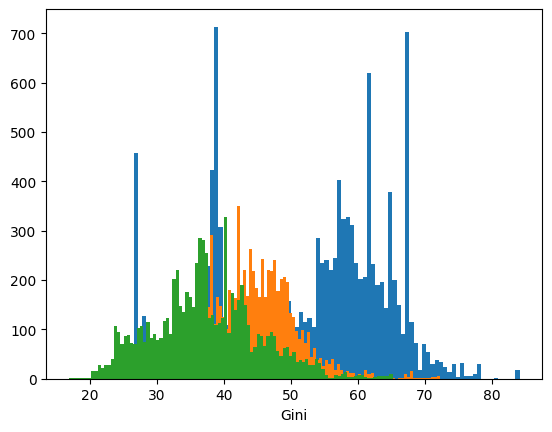

In [72]:
wiid = TGall.WIID.replace(0,np.nan).mul(100).dropna()
gini_disp = TGall.gini_disp.replace(0,np.nan).dropna()
gini_mkt = TGall.gini_mkt.replace(0,np.nan).dropna()
#plt.style.use('dark_background')

plt.hist(wiid, 100)
plt.hist(gini_mkt, 100)
plt.hist(gini_disp, 100)

plt.xlabel("Gini")

In [73]:
cd("Serbia").tail()

[WinError 123] The filename, directory name, or volume label syntax is incorrect: '("Serbia").tail()'
c:\Users\joshu\UBC\H\GonGrowth


In [74]:
tfp_giniCC = tfp_gini.dropna()
CC = TGall.dropna()

We could build a model for inequality without gdp or income

# More Variable

In [75]:
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(tfp_gini, x_vars=['TFP', 'Gini'], 
#            y_vars='Country', size=20, aspect=.5, kind='scatter')
#plt.show()

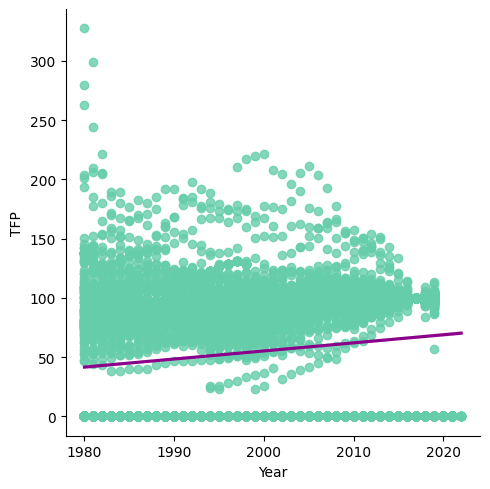

In [76]:
sns.lmplot(data=TGall[TGall["Year"] >= 1980], x="Year", y="TFP", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

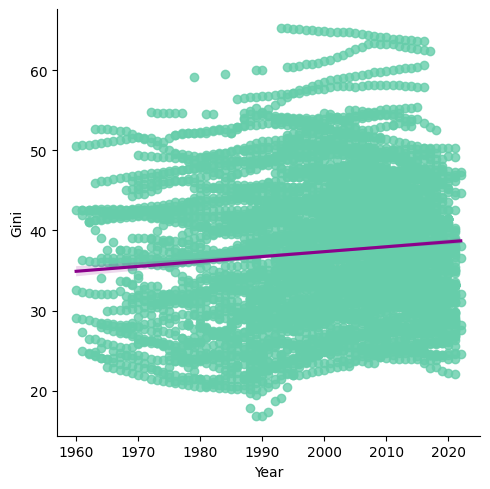

In [77]:
sns.lmplot(data=TGC(["Gini"],Year = True), x="Year", y="Gini", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

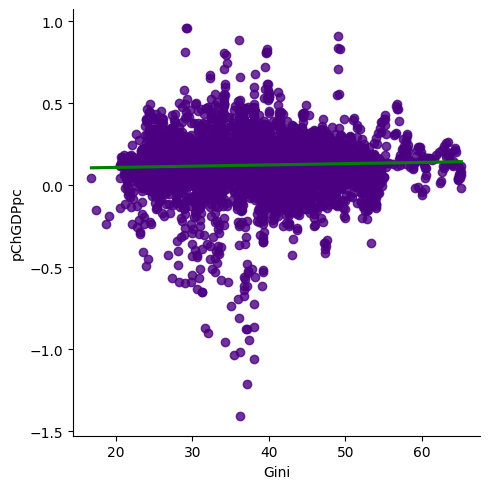

In [78]:
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
edc = TGall[["lnGDPPC", "Gini", "lnGDPPCm5"]].replace(0,np.nan).dropna(axis = 0)
#edc.tail(50)
edc["pChGDPpc"] = TGall["lnGDPPC"] - TGall["lnGDPPCm5"]
edc = edc[(edc["Gini"] <= -.01) | (edc["Gini"] >= .01)]
sns.lmplot(data=edc, x="Gini", y="pChGDPpc", line_kws={'color': 'green'}, scatter_kws = {'color' : 'indigo'})#, size = 10)

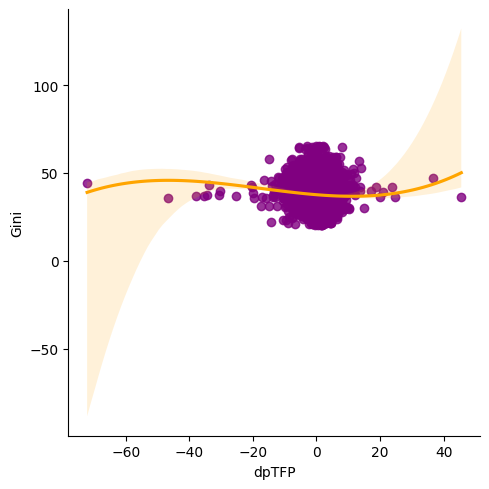

In [79]:
sns.lmplot(data=TGC(["dpTFP", "Gini"]), x="dpTFP", y="Gini", order = 3, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

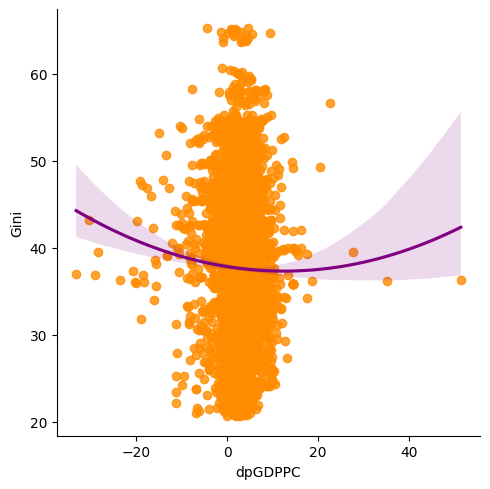

In [80]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "Gini"]), x="dpGDPPC", y="Gini", order = 2, line_kws={'color': 'purple'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)

In [81]:
TGC(["dpTFP", "lnGDPPC", "Gini"])

,dpTFP,lnGDPPC,Gini
290,11.831664,7.833074,49.8
295,9.281542,8.661042,49.3
296,5.056752,8.816371,49.1
297,-4.311194,8.866103,49.1
298,1.812974,8.925410,49.1
...,...,...,...
20829,-1.446923,7.374002,47.1
20830,-1.824487,7.352441,47.1
20831,-1.953656,7.335634,47.2
20832,1.948935,7.366677,47.2


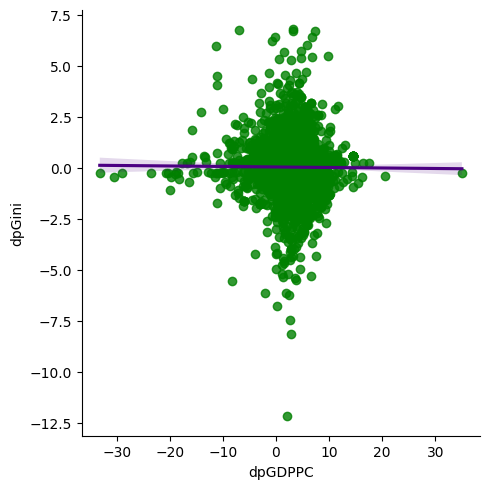

In [82]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "dpGini"]), x="dpGDPPC", y="dpGini", line_kws={'color': 'indigo'}, scatter_kws = {'color' : 'green'})#, size = 10)

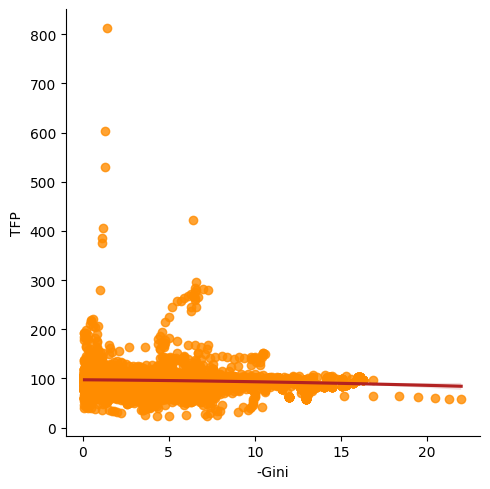

In [83]:
sns.lmplot(data=TGC(["TFP", "-Gini"]), y="TFP", x="-Gini", order = 2, line_kws={'color': 'firebrick'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)


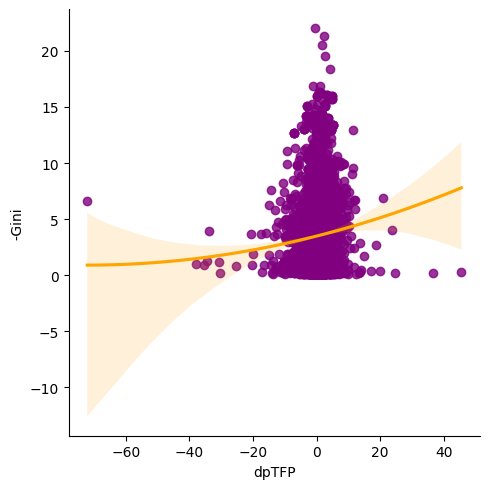

In [84]:
sns.lmplot(data=TGC(["dpTFP", "-Gini"]), x="dpTFP", y="-Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

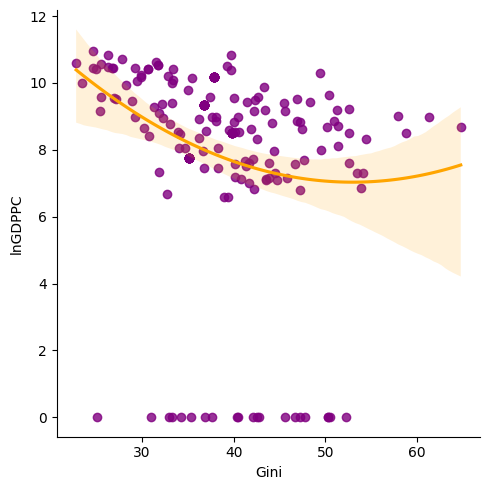

In [85]:
sns.lmplot(data=TGall[TGall["Year"] == 2001], y="lnGDPPC", x="Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

In [86]:
# sns.lmplot(data=cd(), x="TFP", y="Gini")

In [87]:
"""
from scipy import stats
penguins = sns.load_dataset("penguins")

sns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")
"""

'\nfrom scipy import stats\npenguins = sns.load_dataset("penguins")\n\nsns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")\n'

## dTFP and dGini
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

In [88]:
#def r2(x, y):
#    return stats.pearsonr(x, y)[0] ** 2

# r2(CC.dgdppc, CC.dGini)

In [89]:
#sns.regplot(data=tfp_gini, x="dTFP", y="Gini")

In [90]:
# mmm = sns.regplot(data=tfp_gini, x="dTFP", y="dGini", order=2)

# ML Regression

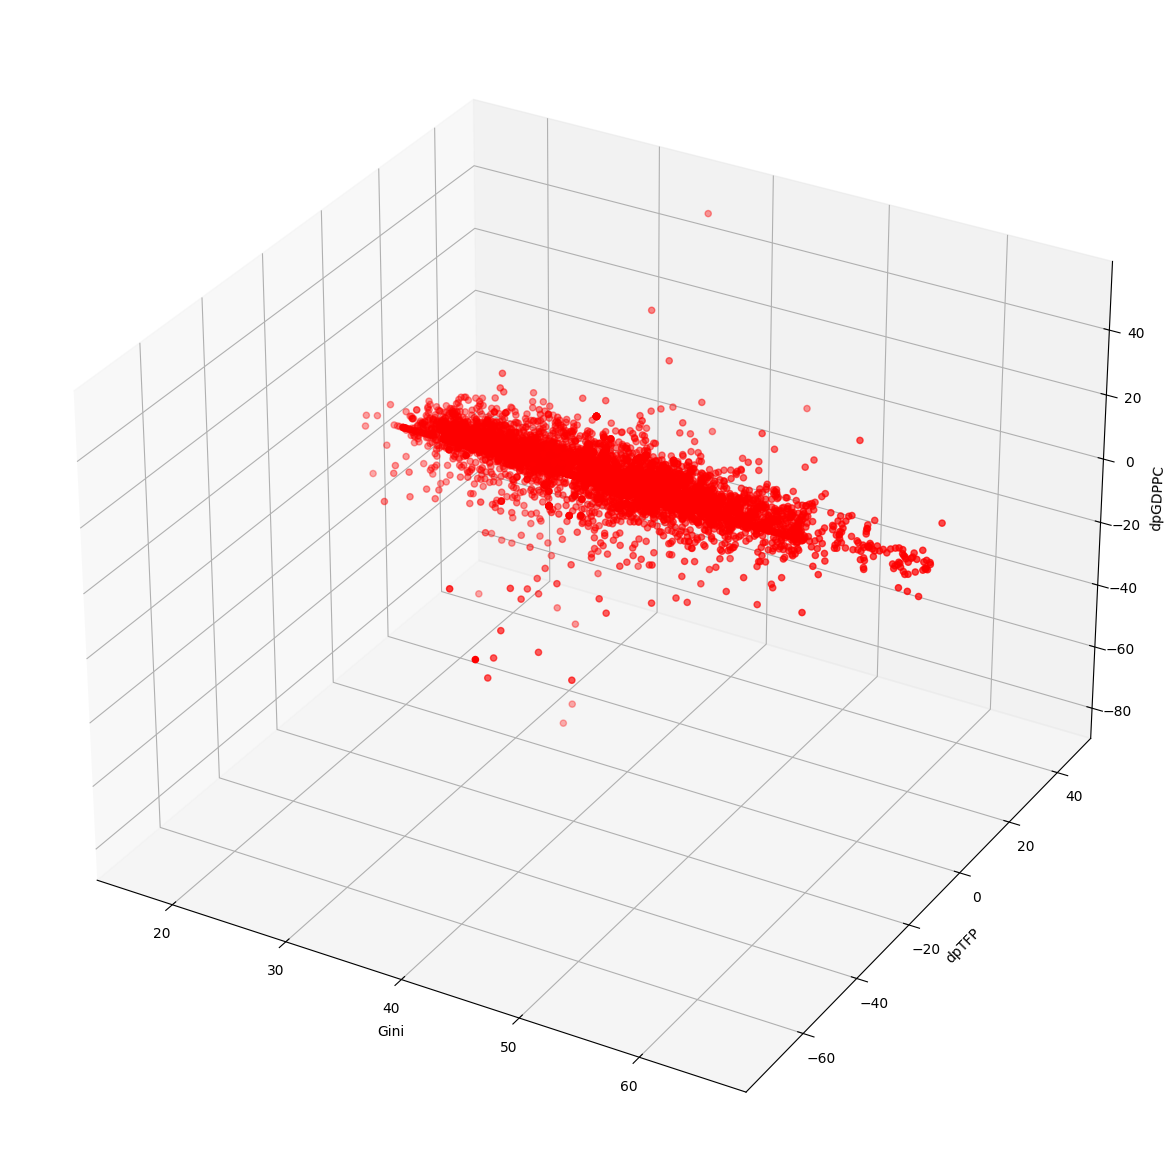

In [91]:
from ctypes import sizeof


fig=plt.figure(figsize=(15, 15))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(TGall["Gini"],TGall["dpTFP"],TGall["dpGDPPC"],color="red")
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP")
ax.set_zlabel("dpGDPPC")
plt.show()

In [92]:
"""
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['dTFP']]) 
test_y = np.array(test[['dGini']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
"""

'\n# Predicting values:\n# Function for predicting future values\ndef get_regression_predictions(input_features,intercept,slope):\n    predicted_values = input_features*slope + intercept\n    return predicted_values\n\n# Checking various accuracy:\nfrom sklearn.metrics import r2_score \ntest_x = np.array(test[[\'dTFP\']]) \ntest_y = np.array(test[[\'dGini\']]) \ntest_y_ = regr.predict(test_x)\nprint("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))\nprint("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))\nprint("R2-score: %.2f" % r2_score(test_y_ , test_y) )\n'

# Machine learning 2
https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171

In [93]:
X = tfp_giniCC[["dTFP"]]
y = tfp_giniCC["dGini"]
X.head()

,dTFP


In [94]:
#Initiate the theta values.
theta = np.array([0]*len(X.columns))

#number of training data
m = len(X)

def hypothesis(theta, X):
    return theta*X

#Define the cost function
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [95]:
#Predict Outputs
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
y

Series([], Name: dGini, dtype: float64)

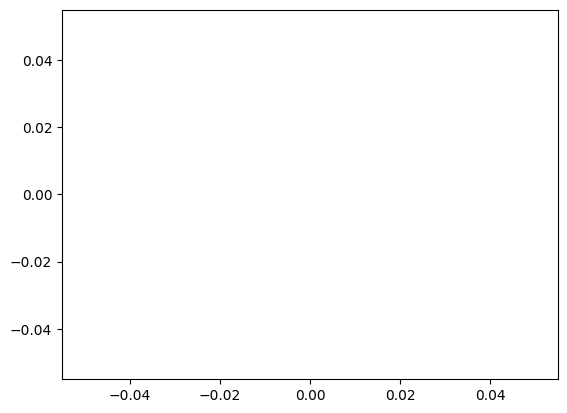

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x = list(range(0, len(y))), y= y, color='blue')         
plt.scatter(x=list(range(0, len(y))), y=y_hat, color='darkred')
plt.show()

## Simple Linear Regression

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [97]:
X = TGC(["lnGDPPC", "Gini"])
model = LinearRegression()
reg = model.fit(X['lnGDPPC'].values.reshape(-1, 1), X['Gini'].values.reshape(-1, 1))
y_pred = reg.predict(X['lnGDPPC'].values.reshape(-1, 1))
y_pred

array([[39.67658519],
       [40.01365383],
       [39.7443034 ],
       ...,
       [42.40740354],
       [42.31815132],
       [42.26586592]])

In [98]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5"]].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 9.967e+04
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:58:08   Log-Likelihood:                 2832.8
No. Observations:                5688   AIC:                            -5658.
Df Residuals:                    5684   BIC:                            -5631.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2115      0.047     25.780      0.0

In [99]:
X

,IVlnGG,IVGinim5,lnGDPPC,lnGDPPCm5
149,317.192896,36.4,8.572781,8.285434
150,321.114902,36.5,8.632121,8.168199
151,324.520767,36.6,8.700289,8.261881
152,327.014815,36.8,8.767153,8.396616
153,330.363147,36.9,8.833239,8.478136
...,...,...,...,...
20829,347.315488,47.1,7.374002,7.158550
20830,346.299976,47.0,7.352441,7.245553
20831,346.241924,46.9,7.335634,7.323171
20832,347.707136,47.0,7.366677,7.380256


In [100]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5']].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.005e+04
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:58:08   Log-Likelihood:                 2845.2
No. Observations:                5688   AIC:                            -5678.
Df Residuals:                    5682   BIC:                            -5639.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9362      0.076     12.282      0.0

In [101]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n"]].replace(0,np.nan).dropna()
X = X[X.lnGDPPC > 10]
X.to_csv("tansferdata.csv")

In [102]:
#( len(TGall['OilP'].dropna()) - len(TGall.Gini.dropna()) )/ len(TGall.Gini.dropna()) # lose 32% of data when OilP is included

In [103]:
TGC(["IVlnGG"]).mean()

IVlnGG    336.013405
dtype: float64

In [104]:
y = "lnGDPPC"
X = TGC(["Ginim5", "lnGGm5", "lnGDPPCm5", y], Year = True)

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
print(est2.predict())


[8.42687769 8.31248667 8.40595383 ... 7.44475547 7.50373878 7.50510491]


In [105]:
y = "Gini"
X = TGC(["lnGDPPC", y])

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
est2.predict([50,70])

array([2973.66237586])

### Extremly predictive, dTFP on Gini

run on several years avg

Taxes, democracy, news freedom as control variable

In [106]:
#TGall.tail().drop(columns = ["Year", "Country", ])
TGall["lnGDPPC"].mean()

7.397086179427158

In [107]:
X = TGC(["dpTFP", "dpGini", "TMITR"], Year = False, FE = False)
X2 = sm.add_constant(X.drop(columns = ["dpGini"]))
est = sm.OLS(X.dpGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.968
Date:                Fri, 23 Feb 2024   Prob (F-statistic):             0.0533
Time:                        23:58:08   Log-Likelihood:                -385.76
No. Observations:                 237   AIC:                             777.5
Df Residuals:                     234   BIC:                             787.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9059      0.312      2.905      0.0

In [108]:
X = TGC(["dpTFP", "dpTFP^2", "TMITR", "Gini"], Year = False)
X2 = sm.add_constant(X.drop(columns = ["Gini"]))
est = sm.OLS(X.Gini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     49.72
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.67e-25
Time:                        23:58:08   Log-Likelihood:                -658.38
No. Observations:                 268   AIC:                             1325.
Df Residuals:                     264   BIC:                             1339.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9895      0.674     54.909      0.0

In [109]:
#Average standard deviation per gini coefficient
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["Gini"], country = x)
    std += temp["Gini"].std()

print(std / tfp_gini["Country"].unique().size)

nan


In [110]:
tfp_gini.Gini.std()

8.61610053338596

In [111]:
# Avg std for dNGini
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["dNGini"], country = x)
    std += temp["dNGini"].std()

print(std / tfp_gini["Country"].unique().size)

nan


In [112]:
X = TGC(["dCTFP", "dpCTFP^2", "Gini"])
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.263
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           0.000709
Time:                        23:58:11   Log-Likelihood:                -15829.
No. Observations:                4474   AIC:                         3.166e+04
Df Residuals:                    4471   BIC:                         3.168e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.6270      0.126    298.206      0.0

In [113]:
"""
X = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())
"""

'\nX = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)\nX2 = sm.add_constant(X.drop(columns = ("dpGini")))\nest = sm.OLS(X["dpGini"], X2)\nest2 = est.fit()\nprint(est2.summary())\n'

In [114]:
TGC(["dpTFP", "dpTFP^2", "Gini", "dpGDPPC"], FE = False, Year = True)

,Year,dpTFP,dpTFP^2,Gini,dpGDPPC
290,2002,11.831664,139.988262,49.8,14.277992
295,2007,9.281542,86.147023,49.3,20.459013
296,2008,5.056752,25.570736,49.1,14.386657
297,2009,-4.311194,18.586391,49.1,4.851511
298,2010,1.812974,3.286874,49.1,5.758289
...,...,...,...,...,...
20829,2014,-1.446923,2.093587,47.1,-0.627353
20830,2015,-1.824487,3.328752,47.1,-2.179487
20831,2016,-1.953656,3.816770,47.2,-1.694915
20832,2017,1.948935,3.798347,47.2,3.056574


## Ridge Regression

In [115]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [116]:
TGall.columns

Index(['Country', 'Year', 'CTFP', 'CWTFP', 'TFP', 'WTFP', 'Gini', 'gini_disp',
       'gini_disp_se', 'gini_mkt', 'gini_mkt_se', 'abs_red', 'abs_red_se',
       'rel_red', 'rel_red_se', 'WIID', '-Gini', 'dGini', 'd5Gini', 'dpGini',
       'd5pGini', 'dNGini', 'dpGinim5', 'Ginim5', 'dTFP', 'dpTFP', 'dpTFPm1',
       'dpTFPm2', 'dpTFPavg', '-dpTFP^2', 'dpTFP^2', 'dpTFP^3', 'log(dpTFP)',
       'dCTFP', 'dpCTFP', 'dCTFPm1', 'dCTFPm2', 'dCTFPavg', '-dpCTFP^2',
       'dpCTFP^2', 'dpCTFP^3', 'dWTFP', 'dWTFPm1', 'dWTFPm2', 'dWTFPavg',
       '-dWTFP^2', 'dWTFP^2', 'dWTFP^3', 'GDPPC_x', 'pop_x', 'GDP_x', 'dGDPPC',
       'd5GDPPC', 'dpGDPPC', 'd5pGDPPC', 'dpGDPPC^2', 'lnGDPPC', 'Gini2m5',
       'lnGG', 'lnGGm5', 'lnGDPPCm5', 'TWWI', 'TWWIavg', 'TMITR', 'Oil',
       'GDPPC_y', 'pop_y', 'GDP_y', 'OdivGDP', 'OilW', 'Price', 'lnP', 'dlnP',
       'OilP', 'OlnP', 'OilWP', 'OPS', 'IVGini', 'IVGinim5', 'IVlnGG',
       'IVlnGGm5', 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', 'iso3',
       

In [117]:
rdf = TGall[["Year", "Country", "IVGinim5", "IVGini2m5", "lnGDPPC", "lnGDPPCm5", "abs_red", "n"]].replace(0,np.nan).dropna().reset_index(drop=True)
len(rdf.Country.unique())

149

In [118]:
#interaction variables
irdf = rdf.drop(["lnGDPPC", "Year", "Country"], axis = 1)

variables = irdf.columns
df_interaction = irdf
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        df_interaction[f'{variables[i]}*{variables[j]}'] = irdf[variables[i]] * irdf[variables[j]]
        
irdf = pd.concat([rdf[["Country", "lnGDPPC", "Year"]], df_interaction], axis=1).drop(["IVGinim5*IVGini2m5"], axis = 1)
irdf = pd.get_dummies(irdf, columns=['Country'], prefix='', prefix_sep='')
irdf["Intercept"] = 1
irdf

,lnGDPPC,Year,IVGinim5,IVGini2m5,lnGDPPCm5,abs_red,n,IVGinim5*lnGDPPCm5,IVGinim5*abs_red,IVGinim5*n,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Intercept
0,8.572781,2001,36.4,1324.96,8.285434,10.9,-0.938470,301.589796,396.76,-34.160324,...,0,0,0,0,0,0,0,0,0,1
1,8.632121,2002,36.5,1332.25,8.168199,10.8,-0.299877,298.139258,394.20,-10.945499,...,0,0,0,0,0,0,0,0,0,1
2,8.700289,2003,36.6,1339.56,8.261881,10.9,-0.374149,302.384846,398.94,-13.693860,...,0,0,0,0,0,0,0,0,0,1
3,8.767153,2004,36.8,1354.24,8.396616,11.1,-0.417931,308.995463,408.48,-15.379875,...,0,0,0,0,0,0,0,0,0,1
4,8.833239,2005,36.9,1361.61,8.478136,11.1,-0.511790,312.843227,409.59,-18.885055,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,7.374002,2014,47.1,2218.41,7.158550,2.4,2.191391,337.167717,113.04,103.214519,...,0,0,0,0,0,0,0,0,1,1
5628,7.352441,2015,47.0,2209.00,7.245553,2.4,2.136294,340.540977,112.80,100.405829,...,0,0,0,0,0,0,0,0,1,1
5629,7.335634,2016,46.9,2199.61,7.323171,2.4,2.081806,343.456707,112.56,97.636689,...,0,0,0,0,0,0,0,0,1,1
5630,7.366677,2017,47.0,2209.00,7.380256,2.4,2.043620,346.872022,112.80,96.050135,...,0,0,0,0,0,0,0,0,1,1


In [119]:
scaler = StandardScaler()
X = scaler.fit_transform(irdf.drop('lnGDPPC', axis=1))
y = irdf['lnGDPPC'].values

ridge = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=10)
ridge.fit(X, y)

feature_names = list(irdf.drop('lnGDPPC', axis=1).columns)
ridge_coeff_df = pd.DataFrame(ridge.coef_, index=feature_names, columns=['Coefficient'])

ridge_coeff_df.head(30)

,Coefficient
Year,0.109441
IVGinim5,1.043442
IVGini2m5,-0.461406
lnGDPPCm5,1.189751
abs_red,0.946739
n,0.841411
IVGinim5*lnGDPPCm5,-0.674611
IVGinim5*abs_red,-0.244103
IVGinim5*n,-1.703328
IVGini2m5*lnGDPPCm5,0.195461


In [120]:
X_df = pd.DataFrame(X, columns = irdf.drop('lnGDPPC', axis=1).columns)
X_df.columns[0:20]

Index(['Year', 'IVGinim5', 'IVGini2m5', 'lnGDPPCm5', 'abs_red', 'n',
       'IVGinim5*lnGDPPCm5', 'IVGinim5*abs_red', 'IVGinim5*n',
       'IVGini2m5*lnGDPPCm5', 'IVGini2m5*abs_red', 'IVGini2m5*n',
       'lnGDPPCm5*abs_red', 'lnGDPPCm5*n', 'abs_red*n', 'Albania', 'Algeria',
       'Angola', 'Argentina', 'Armenia'],
      dtype='object')

In [121]:
print(X_df.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].values[0][2])
print(scaler.transform(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].drop('lnGDPPC', axis = 1).values)[0][2])
#print(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].values[0])

-0.7192588958377634
-0.7192588958377634


c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [122]:
prediction = ridge.predict((scaler.transform(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].drop('lnGDPPC', axis = 1).values)).reshape(1, -1))
print(prediction)

[10.79219933]


c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [123]:
def mlCo(Country):
    df = irdf[(irdf.Year ==  2018) & (irdf[Country] == 1)].drop('lnGDPPC', axis = 1)
    pred = pd.DataFrame(columns=["Gini", "pred"])
    
    ## have to edit all vectors that are multiplied by Gini
    for i in range(1,101):
        g = df.IVGinim5.values[0]
        for r in df.columns:
            if "IVGini2m5" in r:
                df[r] = df[r].div(g**2).mul(i**2)
            elif "IVGinim5" in r:
                df[r] = df[r].div(g).mul(i)
        
        tdf = scaler.transform(df.values.reshape(1, -1))
        pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
    return pred
        

c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ign

c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_10836\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ign

<Axes: xlabel='Gini', ylabel='pred'>

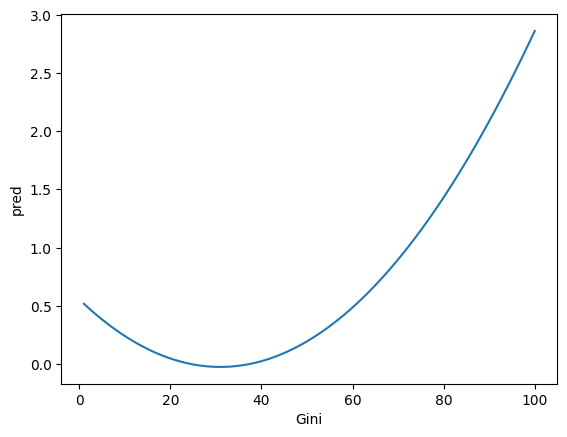

In [124]:
fake = mlCo("Benin")
sns.lineplot(x = "Gini", y = "pred", data = fake)